<a href="https://colab.research.google.com/github/n-shenoy/asian-genome/blob/main/pca_tsne_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt
import altair as alt
from sklearn.manifold import TSNE

In [ ]:
df = pd.read_csv('asian_population_matrix.csv')
df.head()

,Unnamed: 0,22:10526387:C:A,22:10551173:G:A,22:10560829:C:T,22:10568796:A:G,22:10587227:C:A,22:10633527:C:A,22:10648836:C:T,22:10653787:T:C,22:10660594:A:T,...,22:50781950:G:A,22:50785510:C:T,22:50788980:A:C,22:50792206:C:G,22:50795260:T:G,22:50797854:C:T,22:50801209:A:G,22:50806522:C:G,22:50807598:C:G,Population code
0,HG00174,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,FIN
1,HG00459,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CHS
2,HG00473,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,CHS
3,HG00478,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CHS
4,HG00480,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CHS


In [ ]:
df.rename(columns = {"Unnamed: 0":"Sample name"}, inplace = True)
non_snp_columns = ['Population code', 'Sample name']
df_snps = df.drop(non_snp_columns, axis = 1)
matrix = df_snps.to_numpy()
print(matrix.shape)
matrix

(1193, 10665)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

PCA

In [ ]:
pca = decomposition.PCA(n_components=2)
pca.fit(matrix)

PCA(n_components=2)

In [ ]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.06469225 0.0081236 ]
[177.2532723   62.81196708]


In [ ]:
to_plot = pca.transform(matrix)
to_plot.shape

(1193, 2)

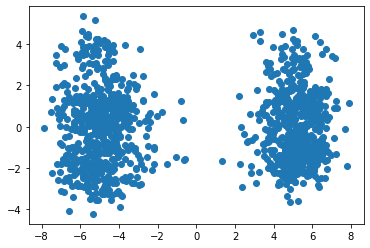

In [ ]:
plt.scatter(x=to_plot[:, 0], y=to_plot[:, 1])

In [ ]:
df_plot = df[non_snp_columns].copy()
df_plot.head()

,Population code,Sample name
0,FIN,HG00174
1,CHS,HG00459
2,CHS,HG00473
3,CHS,HG00478
4,CHS,HG00480


In [ ]:
df_plot['PC1'] = to_plot[:, 0]
df_plot['PC2'] = to_plot[:, 1]
df_plot

,Population code,Sample name,PC1,PC2
0,FIN,HG00174,-5.758423,3.723665
1,CHS,HG00459,5.247763,-1.133387
2,CHS,HG00473,5.241439,-1.318634
3,CHS,HG00478,6.148213,0.959784
4,CHS,HG00480,5.507035,3.768907
...,...,...,...,...
1188,GIH,NA21117,-6.664984,2.010428
1189,GIH,NA21124,-5.745644,-1.528875
1190,GIH,NA21092,-6.411161,-0.971963
1191,GIH,NA21097,-4.732015,-2.808054


In [ ]:
alt.Chart(df_plot).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('Population code', scale=alt.Scale(scheme='category20'))
)

alt.Chart(...)

In [ ]:
population_data = pd.read_csv('igsr-1000 genomes 30x on grch38.tsv.tsv', sep='\t')
population_data.head()

,Sample name,Sex,Biosample ID,Population code,Population name,Superpopulation code,Superpopulation name,Population elastic ID,Data collections
0,HG00105,male,SAME123949,GBR,British,EUR,European Ancestry,GBR,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,HG00112,male,SAME125341,GBR,British,EUR,European Ancestry,GBR,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,HG00117,male,SAME125346,GBR,British,EUR,European Ancestry,GBR,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,HG00129,male,SAME122867,GBR,British,EUR,European Ancestry,GBR,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,HG00131,male,SAME123064,GBR,British,EUR,European Ancestry,GBR,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [ ]:
df_plot = df_plot.merge(population_data, on='Sample name', how='inner')
df_plot

,Population code_x,Sample name,PC1,PC2,Sex,Biosample ID,Population code_y,Population name,Superpopulation code,Superpopulation name,Population elastic ID,Data collections
0,FIN,HG00174,-5.758423,3.723665,female,SAME124958,FIN,"Finnish,Finnish",EUR,"European Ancestry,West Eurasia (SGDP)","FIN,FinnishSGDP","1000 Genomes on GRCh38,Simons Genome Diversity..."
1,CHS,HG00459,5.247763,-1.133387,male,SAME125269,CHS,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes 30x on GRCh38,1000 Genomes phase ..."
2,CHS,HG00473,5.241439,-1.318634,female,SAME123338,CHS,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,CHS,HG00478,6.148213,0.959784,male,SAME123335,CHS,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,CHS,HG00480,5.507035,3.768907,male,SAME124617,CHS,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes 30x on GRCh38,1000 Genomes phase ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1188,GIH,NA21117,-6.664984,2.010428,male,SAME124185,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1189,GIH,NA21124,-5.745644,-1.528875,male,SAME124024,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1190,GIH,NA21092,-6.411161,-0.971963,male,SAME123322,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1191,GIH,NA21097,-4.732015,-2.808054,female,SAME123319,GIH,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [ ]:
df_plot['Population code_x'].equals(df_plot['Population code_y'])

True

In [ ]:
df_plot = df_plot.drop('Population code_y', axis = 1)
df_plot.rename(columns = {"Population code_x":"Population code"}, inplace = True)
df_plot

,Population code,Sample name,PC1,PC2,Sex,Biosample ID,Population name,Superpopulation code,Superpopulation name,Population elastic ID,Data collections
0,FIN,HG00174,-5.758423,3.723665,female,SAME124958,"Finnish,Finnish",EUR,"European Ancestry,West Eurasia (SGDP)","FIN,FinnishSGDP","1000 Genomes on GRCh38,Simons Genome Diversity..."
1,CHS,HG00459,5.247763,-1.133387,male,SAME125269,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes 30x on GRCh38,1000 Genomes phase ..."
2,CHS,HG00473,5.241439,-1.318634,female,SAME123338,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,CHS,HG00478,6.148213,0.959784,male,SAME123335,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,CHS,HG00480,5.507035,3.768907,male,SAME124617,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes 30x on GRCh38,1000 Genomes phase ..."
...,...,...,...,...,...,...,...,...,...,...,...
1188,GIH,NA21117,-6.664984,2.010428,male,SAME124185,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1189,GIH,NA21124,-5.745644,-1.528875,male,SAME124024,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1190,GIH,NA21092,-6.411161,-0.971963,male,SAME123322,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1191,GIH,NA21097,-4.732015,-2.808054,female,SAME123319,Gujarati,SAS,South Asian Ancestry,GIH,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [ ]:
alt.Chart(df_plot).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('Population name', scale=alt.Scale(scheme='category20'))
)

alt.Chart(...)

In [ ]:
alt.Chart(df_plot).mark_point().encode(
    x='PC1',
    y='PC2',
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20')),
    fill='Population name'
)

alt.Chart(...)

tSNE

In [ ]:
X = matrix
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(X)
X_embedded.shape

(1193, 2)

In [ ]:
df_plot['tsne1'] = X_embedded[:,0]
df_plot['tsne2'] = X_embedded[:,1]

In [ ]:
df_plot.head()

,Population code,Sample name,PC1,PC2,Sex,Biosample ID,Population name,Superpopulation code,Superpopulation name,Population elastic ID,Data collections,tsne1,tsne2
0,FIN,HG00174,-5.758423,3.723665,female,SAME124958,"Finnish,Finnish",EUR,"European Ancestry,West Eurasia (SGDP)","FIN,FinnishSGDP","1000 Genomes on GRCh38,Simons Genome Diversity...",-37.539482,-5.042500
1,CHS,HG00459,5.247763,-1.133387,male,SAME125269,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes 30x on GRCh38,1000 Genomes phase ...",20.103838,-38.160355
2,CHS,HG00473,5.241439,-1.318634,female,SAME123338,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",26.263863,-24.405111
3,CHS,HG00478,6.148213,0.959784,male,SAME123335,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",45.484287,-25.625780
4,CHS,HG00480,5.507035,3.768907,male,SAME124617,Southern Han Chinese,EAS,East Asian Ancestry,CHS,"1000 Genomes 30x on GRCh38,1000 Genomes phase ...",45.805771,-25.793240


In [ ]:
alt.Chart(df_plot).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20')),
    fill = "Population name"
)

alt.Chart(...)

In [ ]:
alt.Chart(df_plot).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Superpopulation name', scale=alt.Scale(scheme='category20'))
)

alt.Chart(...)

In [ ]:
alt.Chart(df_plot).mark_point().encode(
    x='tsne1',
    y='tsne2',
    color=alt.Color('Population name', scale=alt.Scale(scheme='category20'))
)

alt.Chart(...)